In [2]:
import numpy as np
import tensorflow as tf

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0, 100, size=(5,5))

In [5]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [6]:
rand_b = np.random.uniform(0,100,size=(5,1))

In [7]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [9]:
add_op = a + b

In [10]:
mul_op = a * b

In [11]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:10, b:20})
    print(add_result)

30.0


In [12]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    print('\n')
    mult_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


## Neural Network

In [13]:
n_features = 10
n_dense_neurons = 3

In [14]:
x = tf.placeholder(tf.float32, (None, n_features))

In [15]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [16]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [17]:
xW = tf.matmul(x, W)

In [18]:
z = tf.add(xW, b)

In [19]:
a = tf.sigmoid(z)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a, feed_dict={x:np.random.random(size=(1, n_features))})

In [22]:
layer_out

array([[ 0.19592889,  0.84230143,  0.36188066]], dtype=float32)

### Simple Regression

In [27]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [28]:
x_data

array([ -0.17289561,   2.24387308,   3.57001461,   3.26783558,
         4.32780247,   5.96742265,   6.14049066,   6.63051206,
         7.54219188,  10.41297596])

In [29]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [30]:
y_label

array([ 0.93679768,  1.62189237,  2.67752533,  3.10704016,  4.91423045,
        4.68304005,  7.14644022,  7.86664797,  9.63445   ,  8.78127057])

In [31]:
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

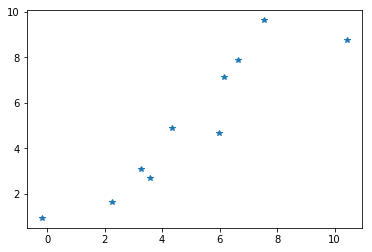

In [34]:
plt.plot(x_data, y_label, '*')

y = mx + b

In [35]:
np.random.rand(2)

array([ 0.78452185,  0.68724204])

In [37]:
m = tf.Variable(0.78)
b = tf.Variable(0.68)

In [51]:
error = 0

for x,y in zip(x_data, y_label):
    
    y_hat = tf.add(tf.multiply(m, x), b)
    error += (y-y_hat)**2

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [53]:
init = tf.global_variables_initializer()

In [59]:
with tf.Session() as sess:
    
    sess.run(init)
    
    traininig_steps=1000
    
    for i in range(traininig_steps):
        
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m, b])
    

In [60]:
x_test = np.linspace(-1,11, 10)

y_pred_plot = final_slope*x_test + final_intercept

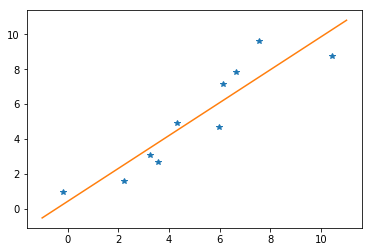

In [61]:
plt.plot(x_data, y_label, '*')
plt.plot(x_test, y_pred_plot)

In [62]:
final_slope

0.94438839

In [63]:
final_intercept

0.42213777